# Probability mass functions


In [1]:
pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


# Make a PMF
The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.

1. Make a PMF for year with normalize=False and display the result.


In [2]:
from empiricaldist import Pmf

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
#Load Data
GSS = r'F:\Data Analysis\Springboard\Data Science Career Track\8.Exploratory Data Analysis in Python\Datasets\gss.hdf5'

gss = pd.read_hdf(GSS)
gss

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.889300
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.444600
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.333900
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.889300
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.889300
...,...,...,...,...,...,...,...,...,...,...
62461,2016,32.0,1984.0,1,1,13.0,74880.0,1.0,NaN,0.956994
62462,2016,61.0,1955.0,2,1,16.0,65520.0,NaN,1.0,0.956994
62463,2016,67.0,1949.0,2,1,13.0,NaN,NaN,2.0,1.564363
62464,2016,57.0,1959.0,2,1,12.0,9945.0,2.0,NaN,0.956994


In [4]:
# Compute the PMF for year
year = gss['year']
# Compute the PMF for year
pmf_year = Pmf(year, normalize=False)

# Print the result
print(pmf_year)

TypeError: __init__() got an unexpected keyword argument 'normalize'

# Plot a PMF
Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

1. Select the 'age' column from the gss DataFrame and store the result in age.
2. Make a normalized PMF of age. Store the result in pmf_age.
3. Plot pmf_age as a bar chart.

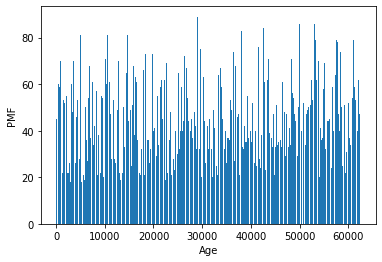

In [5]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar(label='age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# Cumulative distribution functions


# Make a CDF
In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the empiricaldist library.

1. Select the 'age' column. Store the result in age.
2. Compute the CDF of age. Store the result in cdf_age.
3. Calculate the CDF of 30.

In [6]:
from empiricaldist import Cdf

In [7]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


# Compute IQR
Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

1. Calculate the 75th percentile of income and store it in percentile_75th.
2. Calculate the 25th percentile of income and store it in percentile_25th.
3. Calculate the interquartile range of income. Store the result in iqr

In [8]:
#Calculating Cdf of income
income = gss['realinc']

cdf_income = Cdf(income)

In [9]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

0.0


# Plot a CDF
The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

1. Select 'realinc' from the gss dataset.
2. Make a Cdf object called cdf_income.
3. Create a plot of cdf_income using .plot().

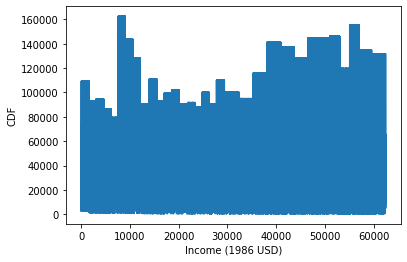

In [10]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

# Comparing distributions


# Extract education levels
Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

1. Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
2. Complete the line that identifies respondents with 12 or fewer years of education.
3. Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [11]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


# Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')
You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

1. Fill in the missing lines of code to plot the CDFs.


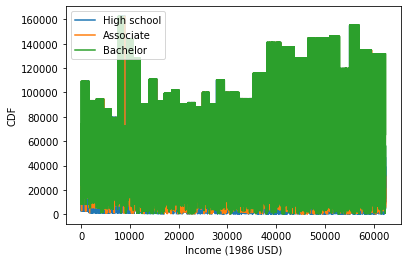

In [12]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Modeling distributions


# Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function

1. Extract 'realinc' from gss and compute its logarithm using np.log10().
2. Compute the mean and standard deviation of the result.
3. Make a norm object by passing the computed mean and standard deviation to norm().


In [13]:
from scipy.stats import norm

In [14]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


# Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

1. Evaluate the normal cumulative distribution function using dist.cdf.
2. Use the Cdf() function to compute the CDF of log_income.
3. Plot the result.


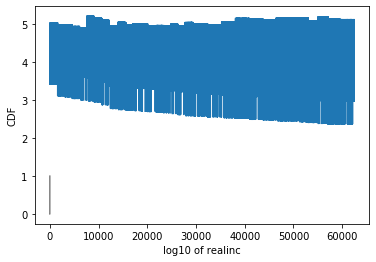

In [15]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

# Comparing PDFs
In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

from scipy.stats import norm
dist = norm(mean, std)
Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. To learn more about this function and Seaborn, you can check out DataCamp's Data Visualization with Seaborn course. Here, Seaborn has been imported for you as sns.

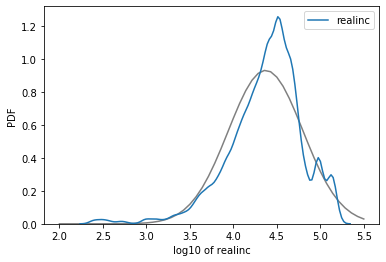

In [16]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()